In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("seaborn-v0_8")


In [3]:
df = pd.read_csv("HomeC.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (108793, 32)


C:\Users\DELL\AppData\Local\Temp\ipykernel_4232\632299307.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HomeC.csv")


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108793 entries, 0 to 108792
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 108793 non-null  int64  
 1   use [kW]             108793 non-null  float64
 2   gen [kW]             108793 non-null  float64
 3   House overall [kW]   108793 non-null  float64
 4   Dishwasher [kW]      108793 non-null  float64
 5   Furnace 1 [kW]       108793 non-null  float64
 6   Furnace 2 [kW]       108793 non-null  float64
 7   Home office [kW]     108793 non-null  float64
 8   Fridge [kW]          108793 non-null  float64
 9   Wine cellar [kW]     108792 non-null  float64
 10  Garage door [kW]     108792 non-null  float64
 11  Kitchen 12 [kW]      108792 non-null  float64
 12  Kitchen 14 [kW]      108792 non-null  float64
 13  Kitchen 38 [kW]      108792 non-null  float64
 14  Barn [kW]            108792 non-null  float64
 15  Well [kW]        

np.int64(0)

In [5]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

df.head()


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:01,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:02,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:03,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:04,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [6]:
print("Start Date:", df.index.min())
print("End Date:", df.index.max())


Start Date: 2016-01-01 05:00:00
End Date: 2016-01-02 11:13:12


In [7]:
hourly_data = df.resample('h').mean(numeric_only=True)
daily_data = df.resample('d').mean(numeric_only=True)

hourly_data.head()


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,1.187276,0.038035,1.187276,0.055087,0.209051,0.236018,0.091815,0.066464,0.019766,0.013373,...,33.010339,0.609728,9.905267,26.325956,1013.323967,7.733644,250.486667,0.000035,20.923411,0.000644
2016-01-01 06:00:00,1.119695,0.080241,1.119695,0.044929,0.237062,0.251944,0.131420,0.052407,0.019162,0.013601,...,18.775006,0.584022,9.916806,9.766472,1024.161161,8.287394,293.827222,0.000000,6.187989,0.000000
2016-01-01 07:00:00,0.953479,0.074560,0.953479,0.036512,0.225252,0.204517,0.100471,0.066452,0.017028,0.013425,...,24.236133,0.614706,9.929494,20.451156,1027.502767,3.838150,131.142778,0.000000,11.636817,0.000000
2016-01-01 08:00:00,1.080323,0.013110,1.080323,0.030701,0.157488,0.187387,0.097202,0.057517,0.021887,0.014500,...,39.956900,0.784944,8.501144,36.097106,1012.871561,6.648811,116.138889,0.010007,33.599206,0.147417
2016-01-01 09:00:00,1.064834,0.046615,1.064834,0.042406,0.236579,0.272748,0.099082,0.057820,0.015738,0.013374,...,24.463689,0.562878,9.119567,15.937556,1010.960267,9.551461,241.294444,0.000385,10.398067,0.014661


In [8]:
df['Kitchen_Total'] = (
    df['Kitchen 12 [kW]'] +
    df['Kitchen 14 [kW]'] +
    df['Kitchen 38 [kW]']
)

df[['Kitchen_Total']].head()


,Kitchen_Total
time,
2016-01-01 05:00:00,0.000567
2016-01-01 05:00:01,0.000567
2016-01-01 05:00:02,0.000617
2016-01-01 05:00:03,0.000650
2016-01-01 05:00:04,0.000783


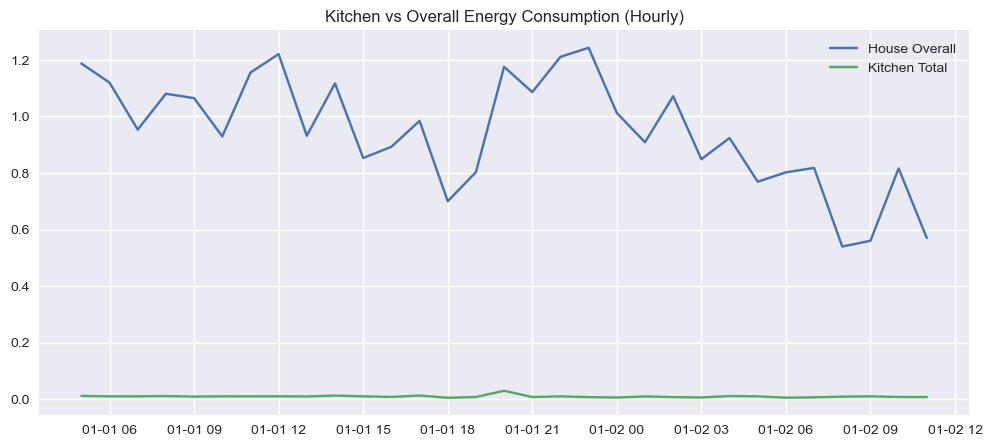

In [9]:
comparison = df[['House overall [kW]', 'Kitchen_Total']].resample('h').mean()

plt.figure(figsize=(12,5))
plt.plot(comparison['House overall [kW]'], label='House Overall')
plt.plot(comparison['Kitchen_Total'], label='Kitchen Total')
plt.legend()
plt.title("Kitchen vs Overall Energy Consumption (Hourly)")
plt.show()


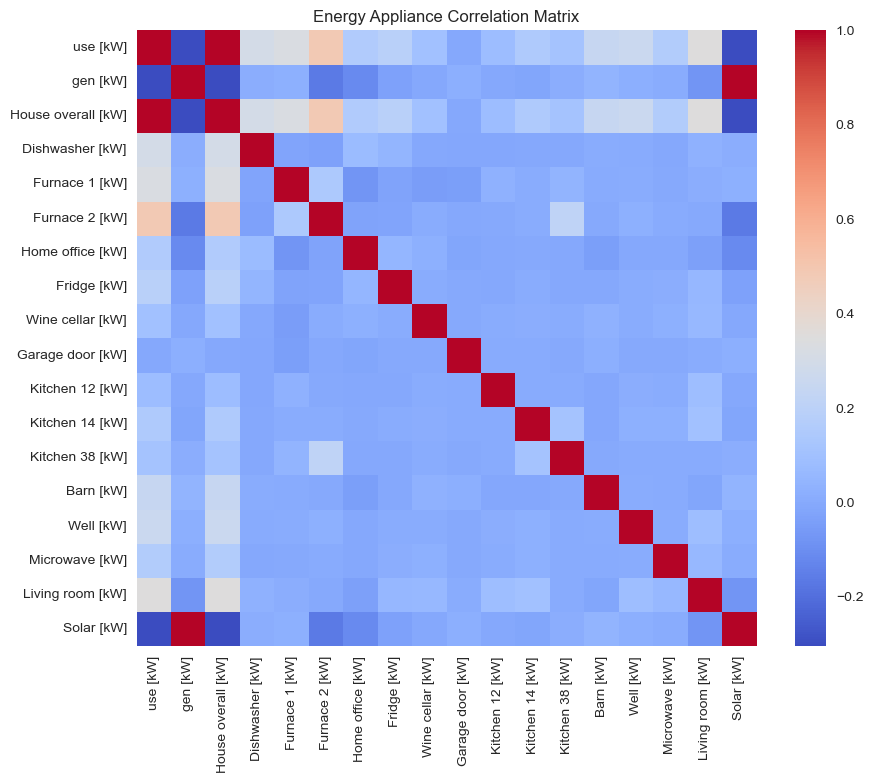

In [10]:
energy_columns = [col for col in df.columns if '[kW]' in col]

plt.figure(figsize=(10,8))
sns.heatmap(df[energy_columns].corr(), cmap='coolwarm')
plt.title("Energy Appliance Correlation Matrix")
plt.show()


In [11]:
energy_df = df[energy_columns]

mean_power = energy_df.mean()
std_power = energy_df.std()

threshold = mean_power + (2 * std_power)

stats_df = pd.DataFrame({
    'Mean': mean_power,
    'Std Dev': std_power,
    'Threshold (Mean + 2*Std)': threshold
})

stats_df.sort_values(by='Mean', ascending=False)


,Mean,Std Dev,Threshold (Mean + 2*Std)
use [kW],0.956471,0.683917,2.324306
House overall [kW],0.956471,0.683917,2.324306
Furnace 2 [kW],0.221994,0.241042,0.704079
Furnace 1 [kW],0.192918,0.211832,0.616583
Home office [kW],0.078773,0.097402,0.273578
gen [kW],0.066935,0.129032,0.325000
Solar [kW],0.066933,0.129030,0.324993
Barn [kW],0.063928,0.153820,0.371568
Fridge [kW],0.053771,0.070946,0.195662
Living room [kW],0.039231,0.101848,0.242928


In [12]:
anomalies = energy_df > threshold
anomalies.sum()


use [kW]               3856
gen [kW]              10173
House overall [kW]     3856
Dishwasher [kW]        2548
Furnace 1 [kW]         1009
Furnace 2 [kW]         2534
Home office [kW]       6351
Fridge [kW]             832
Wine cellar [kW]      11909
Garage door [kW]       1614
Kitchen 12 [kW]         895
Kitchen 14 [kW]        1139
Kitchen 38 [kW]        7477
Barn [kW]              2756
Well [kW]              1492
Microwave [kW]          529
Living room [kW]      11311
Solar [kW]            10174
dtype: int64

In [13]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month

df['Lag_1H'] = df['House overall [kW]'].shift(60)
df['Rolling_3H'] = df['House overall [kW]'].rolling(window=180).mean()

df.dropna(inplace=True)


In [14]:
scaler = MinMaxScaler()
df[energy_columns] = scaler.fit_transform(df[energy_columns])


In [15]:
split_index = int(len(df) * 0.8)

train = df.iloc[:split_index]
test = df.iloc[split_index:]

X_train = train[energy_columns]
y_train = train['House overall [kW]']

X_test = test[energy_columns]
y_test = test['House overall [kW]']


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 1.401918864422925e-31
R2 Score: 1.0
